### **Basic Properties**

#### **Import Library**

In [44]:
#!pip install torch
#!pip install sklearn
#!pip install tensorflow
#!pip install pydot
#!pip install graphviz

In [2]:
# Import Basic Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import warnings
#warnings.filterwarnings("ignore")

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### **Data Preparation**

#### **Import DataSet**

In [3]:
# Load Data
#df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

display(df)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


#### **Data Preprocessing**

In [4]:
# Initial Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

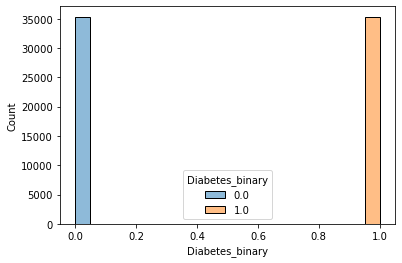

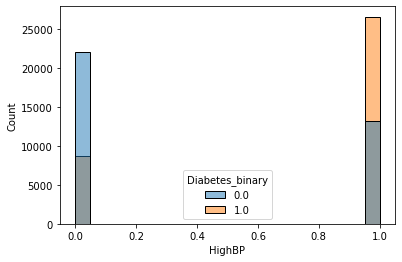

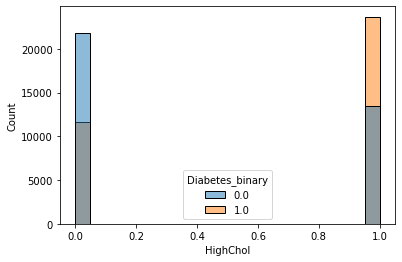

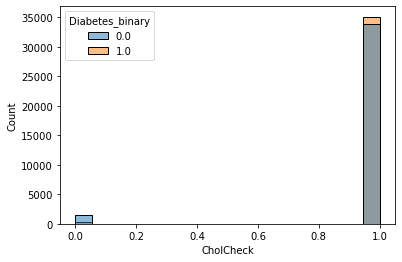

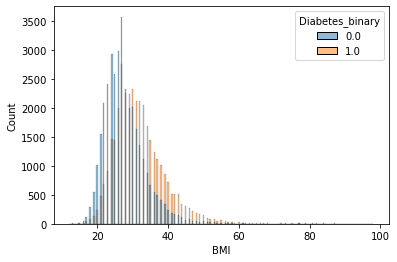

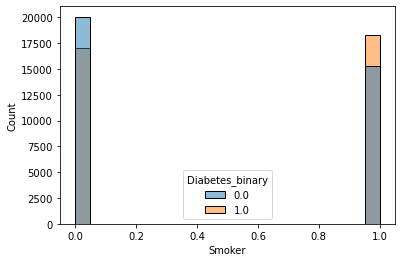

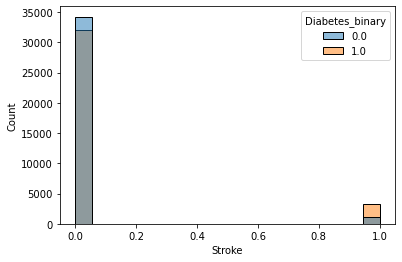

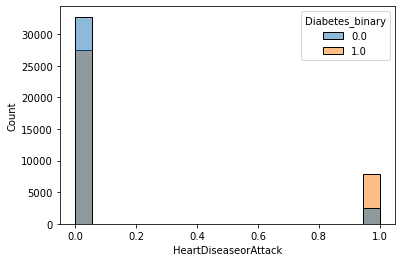

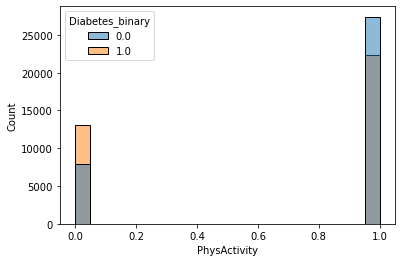

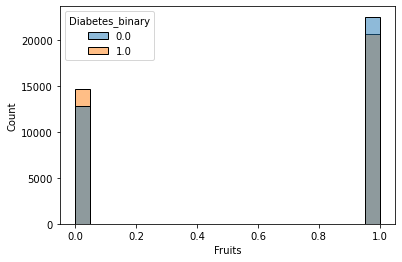

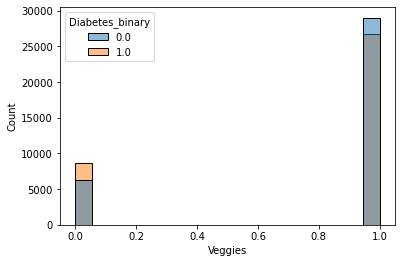

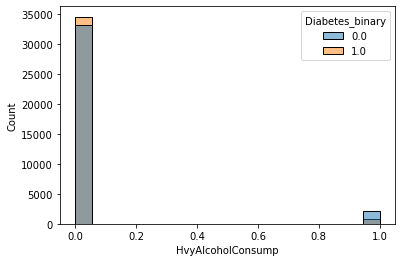

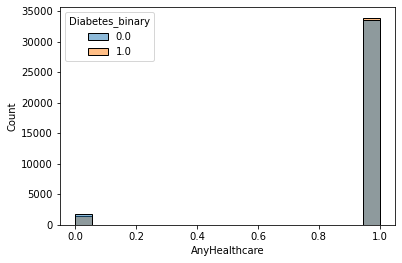

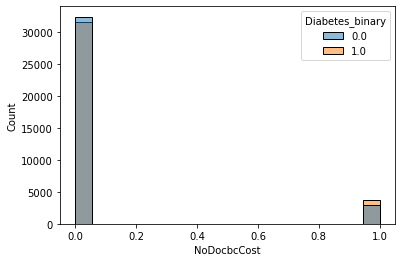

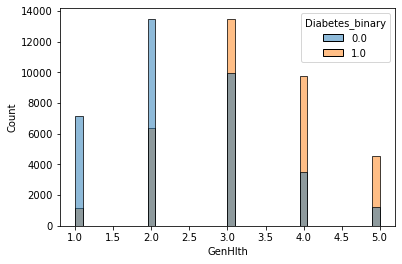

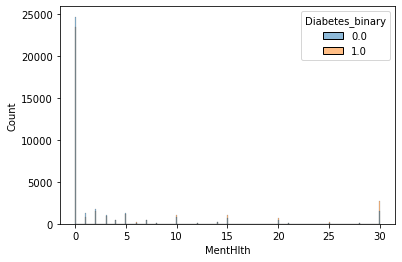

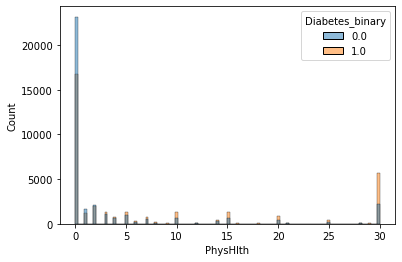

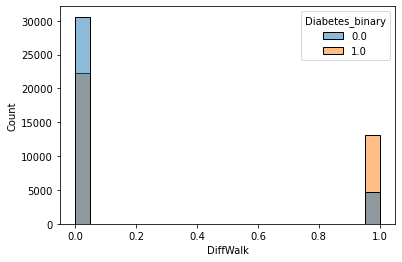

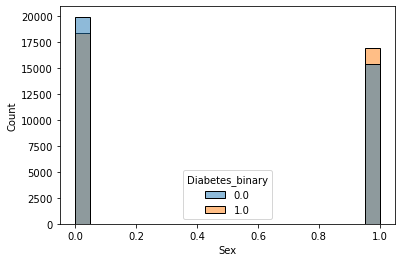

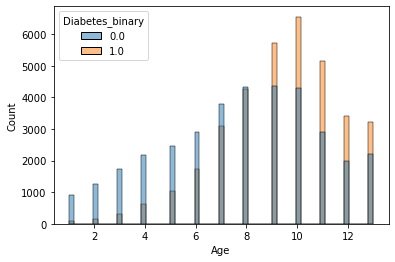

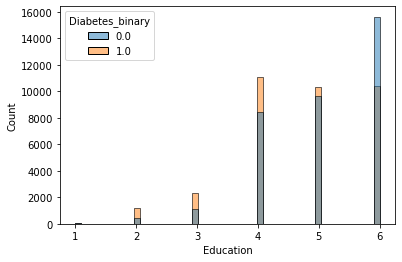

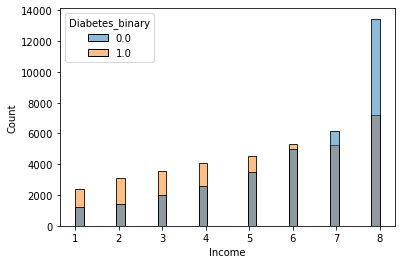

In [5]:
# Detailed Histogram Plot
for column in df.columns:
    #sns.histplot(data=df, x=column, hue="Diabetes_012")
    sns.histplot(data=df, x=column, hue="Diabetes_binary")
    plt.show()

In [6]:
# Drop Column based on Spread Distribution
df = df.drop(columns=["CholCheck",
                      "Stroke",
                      "HeartDiseaseorAttack",
                      "HvyAlcoholConsump",
                      "AnyHealthcare",
                      "NoDocbcCost"])
display(df)

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,26.0,0.0,1.0,0.0,1.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,26.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,26.0,0.0,1.0,1.0,1.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,28.0,1.0,1.0,1.0,1.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,29.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,37.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [7]:
# Switch Binary Position
binary_column_selected = ["PhysActivity", "Fruits", "Veggies"]
for col in binary_column_selected:
    for i in range(len(df)):
        if df[col][i] == 0:
            df[col][i] = 1
        else:
            df[col][i] = 0

In [8]:
# Value Counts of Each Columns
for column in df.columns:
    print(f"========== {column} ==========")
    display(df[column].value_counts())
    print()

========== Diabetes_binary ==========


0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64


========== HighBP ==========


1.0    39832
0.0    30860
Name: HighBP, dtype: int64


========== HighChol ==========


1.0    37163
0.0    33529
Name: HighChol, dtype: int64


========== BMI ==========


27.0    6327
26.0    4975
28.0    4583
24.0    4392
30.0    4344
        ... 
85.0       1
83.0       1
80.0       1
78.0       1
74.0       1
Name: BMI, Length: 80, dtype: int64


========== Smoker ==========


0.0    37094
1.0    33598
Name: Smoker, dtype: int64


========== PhysActivity ==========


0.0    49699
1.0    20993
Name: PhysActivity, dtype: int64


========== Fruits ==========


0.0    43249
1.0    27443
Name: Fruits, dtype: int64


========== Veggies ==========


0.0    55760
1.0    14932
Name: Veggies, dtype: int64


========== GenHlth ==========


3.0    23427
2.0    19872
4.0    13303
1.0     8282
5.0     5808
Name: GenHlth, dtype: int64


========== MentHlth ==========


0.0     48091
30.0     4320
2.0      3267
5.0      2519
1.0      2051
3.0      1967
10.0     1924
15.0     1767
20.0     1125
4.0       981
7.0       825
25.0      425
14.0      353
6.0       288
8.0       198
12.0      130
28.0       99
21.0       84
29.0       53
18.0       42
16.0       28
9.0        28
22.0       22
17.0       18
26.0       17
27.0       17
13.0       15
23.0       13
24.0       10
11.0        8
19.0        7
Name: MentHlth, dtype: int64


========== PhysHlth ==========


0.0     39915
30.0     7953
2.0      4102
1.0      2853
3.0      2438
5.0      2332
10.0     1980
15.0     1913
4.0      1376
7.0      1326
20.0     1292
14.0      802
25.0      557
6.0       447
8.0       276
21.0      229
28.0      211
12.0      205
29.0       95
9.0        55
18.0       50
16.0       50
17.0       35
27.0       34
22.0       31
23.0       27
26.0       26
13.0       26
24.0       24
11.0       22
19.0       10
Name: PhysHlth, dtype: int64


========== DiffWalk ==========


0.0    52826
1.0    17866
Name: DiffWalk, dtype: int64


========== Sex ==========


0.0    38386
1.0    32306
Name: Sex, dtype: int64


========== Age ==========


10.0    10856
9.0     10112
8.0      8603
11.0     8044
7.0      6872
13.0     5426
12.0     5394
6.0      4648
5.0      3520
4.0      2793
3.0      2049
2.0      1396
1.0       979
Name: Age, dtype: int64


========== Education ==========


6.0    26020
5.0    20030
4.0    19473
3.0     3447
2.0     1647
1.0       75
Name: Education, dtype: int64


========== Income ==========


8.0    20646
7.0    11425
6.0    10287
5.0     8010
4.0     6658
3.0     5557
2.0     4498
1.0     3611
Name: Income, dtype: int64

In [9]:
# 1st Duplicates Checking
print("Uniqueness Percentage:", len(df.drop_duplicates()) / len(df))
if len(df.drop_duplicates()) / len(df) != 1:
    df = df.drop_duplicates()
display(df)

Uniqueness Percentage: 0.9689215187008431


,Diabetes_binary,HighBP,HighChol,BMI,Smoker,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,26.0,0.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,26.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,28.0,1.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,29.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,37.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,29.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,18.0,0.0,1.0,1.0,1.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [10]:
# Final Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68495 entries, 0 to 70691
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diabetes_binary  68495 non-null  float64
 1   HighBP           68495 non-null  float64
 2   HighChol         68495 non-null  float64
 3   BMI              68495 non-null  float64
 4   Smoker           68495 non-null  float64
 5   PhysActivity     68495 non-null  float64
 6   Fruits           68495 non-null  float64
 7   Veggies          68495 non-null  float64
 8   GenHlth          68495 non-null  float64
 9   MentHlth         68495 non-null  float64
 10  PhysHlth         68495 non-null  float64
 11  DiffWalk         68495 non-null  float64
 12  Sex              68495 non-null  float64
 13  Age              68495 non-null  float64
 14  Education        68495 non-null  float64
 15  Income           68495 non-null  float64
dtypes: float64(16)
memory usage: 8.9 MB


#### **Explanatory Data Analysis**

In [11]:
# Correlation Matrix v1
df_corr = np.round(df.corr(),5)
df_corr

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.00000,0.36912,0.27898,0.28364,0.07337,0.14834,0.04277,0.07054,0.39400,0.07926,0.20556,0.26617,0.04139,0.27300,-0.15591,-0.21058
HighBP,0.36912,1.00000,0.30612,0.23041,0.07581,0.12681,0.03065,0.05854,0.30551,0.05688,0.16669,0.22881,0.03690,0.33214,-0.12766,-0.17408
HighChol,0.27898,0.30612,1.00000,0.12220,0.08484,0.08350,0.03993,0.03698,0.22540,0.07934,0.13761,0.15738,0.01136,0.23357,-0.07383,-0.09715
BMI,0.28364,0.23041,0.12220,1.00000,0.00075,0.16195,0.07509,0.04841,0.25354,0.09763,0.15373,0.23900,-0.00347,-0.04683,-0.08616,-0.11072
Smoker,0.07337,0.07581,0.08484,0.00075,1.00000,0.07113,0.06681,0.02279,0.13836,0.08563,0.11390,0.11286,0.11385,0.09844,-0.12901,-0.09217
PhysActivity,0.14834,0.12681,0.08350,0.16195,0.07113,1.00000,0.12588,0.14146,0.26145,0.12250,0.22603,0.26892,-0.05142,0.09730,-0.17722,-0.18301
Fruits,0.04277,0.03065,0.03993,0.07509,0.06681,0.12588,1.00000,0.23348,0.08432,0.05579,0.04010,0.04231,0.08880,-0.06674,-0.08717,-0.06629
Veggies,0.07054,0.05854,0.03698,0.04841,0.02279,0.14146,0.23348,1.00000,0.10347,0.04590,0.05874,0.07606,0.05448,0.01530,-0.14244,-0.14385
GenHlth,0.39400,0.30551,0.22540,0.25354,0.13836,0.26145,0.08432,0.10347,1.00000,0.30869,0.54951,0.47114,-0.01715,0.14754,-0.26746,-0.36710
MentHlth,0.07926,0.05688,0.07934,0.09763,0.08563,0.12250,0.05579,0.04590,0.30869,1.00000,0.37529,0.24533,-0.08962,-0.10704,-0.09700,-0.21018


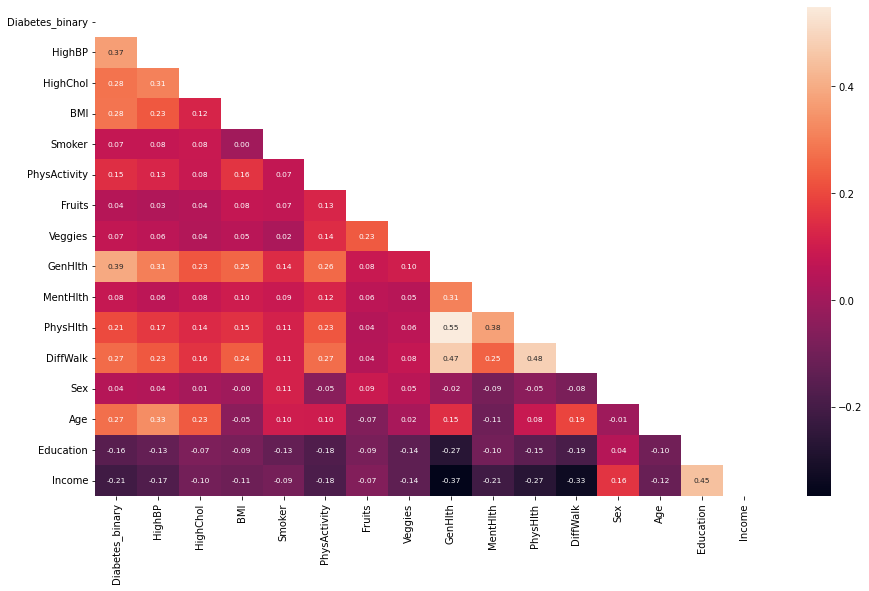

In [12]:
# Correlation Matrix v2
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 9))
ax = sns.heatmap(df_corr, mask=mask, annot=True, annot_kws={'size':7.5}, fmt=".2f")

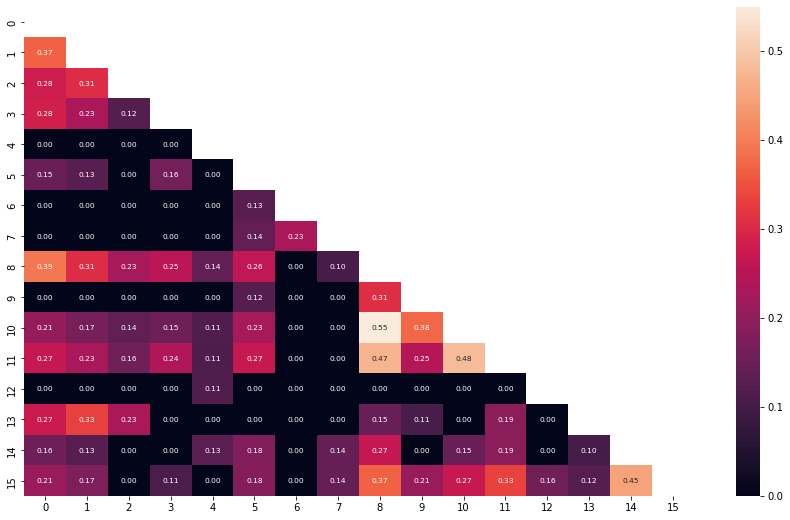

In [13]:
# Correlation Matrix v3
df_corr_modified = abs(np.array(df_corr))
for i in range(len(df_corr_modified)):
    for j in range(len(df_corr_modified)):
        if df_corr_modified[i][j] <= 0.1:
            df_corr_modified[i][j] = 0
            
mask = np.zeros_like(df_corr_modified)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 9))
ax = sns.heatmap(df_corr_modified, mask=mask, annot=True, annot_kws={'size':7.5}, fmt=".2f")

### **Image Creation**

In [14]:
# Additional Drop Column based on Correlation Matrix
df = df.drop(columns=["Smoker",
                      "Fruits",
                      "Veggies",
                      "MentHlth",
                      "Sex"])
display(df)

,Diabetes_binary,HighBP,HighChol,BMI,PhysActivity,GenHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0.0,1.0,0.0,26.0,0.0,3.0,30.0,0.0,4.0,6.0,8.0
1,0.0,1.0,1.0,26.0,1.0,3.0,0.0,0.0,12.0,6.0,8.0
2,0.0,0.0,0.0,26.0,0.0,1.0,10.0,0.0,13.0,6.0,8.0
3,0.0,1.0,1.0,28.0,0.0,3.0,3.0,0.0,11.0,6.0,8.0
4,0.0,0.0,0.0,29.0,0.0,2.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,37.0,1.0,4.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,29.0,1.0,2.0,0.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,25.0,1.0,5.0,0.0,1.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,18.0,1.0,4.0,0.0,1.0,11.0,2.0,4.0


In [15]:
# 2nd Duplicates Checking
print("Uniqueness Percentage:", len(df.drop_duplicates()) / len(df))
if len(df.drop_duplicates()) / len(df) != 1:
    df = df.drop_duplicates()
display(df)

Uniqueness Percentage: 0.8775677056719469


,Diabetes_binary,HighBP,HighChol,BMI,PhysActivity,GenHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0.0,1.0,0.0,26.0,0.0,3.0,30.0,0.0,4.0,6.0,8.0
1,0.0,1.0,1.0,26.0,1.0,3.0,0.0,0.0,12.0,6.0,8.0
2,0.0,0.0,0.0,26.0,0.0,1.0,10.0,0.0,13.0,6.0,8.0
3,0.0,1.0,1.0,28.0,0.0,3.0,3.0,0.0,11.0,6.0,8.0
4,0.0,0.0,0.0,29.0,0.0,2.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,37.0,1.0,4.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,29.0,1.0,2.0,0.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,25.0,1.0,5.0,0.0,1.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,18.0,1.0,4.0,0.0,1.0,11.0,2.0,4.0


#### **Data Splitting**

In [16]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from collections import Counter

In [17]:
# Data Selection
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

# Normalization
mm_scaler = MinMaxScaler(feature_range=(0, 1))
X         = mm_scaler.fit_transform(X)

# Data Splitting
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [18]:
# Class Percentage
_labels, _counts = np.unique(y_train, return_counts=True)
print("Class Distribution:", _counts/len(y_train))

Class Distribution: [0.46133051 0.53866949]


#### **Images Creation**

In [19]:
def reshape_as_image(x, img_width, img_height):
    x_temp = np.zeros((len(x), img_height, img_width))
    for i in range(x.shape[0]):
        x_temp[i] = np.reshape(x[i], (img_height, img_width))
    return x_temp

In [20]:
one_hot_enc = OneHotEncoder(sparse=False, categories='auto')

x_train = reshape_as_image(x_train, 1, 10)
x_test  = reshape_as_image(x_test, 1, 10)

print("Final shape of x,y train/test is {} {} {} {}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

Final shape of x,y train/test is (48087, 10, 1) (48087,) (12022, 10, 1) (12022,)


39136
36388
35544
35454
36999
39549
38159
38044
37106


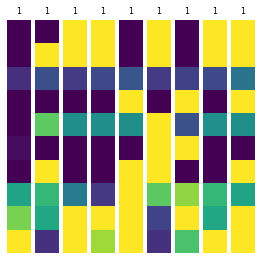

In [213]:
iter_obs = 800
fig = plt.figure(figsize=(50, 5))
index_selection = y_train[iter_obs:iter_obs+100].index

i = 1
for index in index_selection:
    if index < 40000 and y_train[index] == 1:
        img = x_train[index]
        fig.add_subplot(1, len(index_selection), i)
        i += 1

        if y_train[index] == 0:
            plt.title('0', fontsize=8)
        if y_train[index] == 1:
            plt.title('1', fontsize=8)

        plt.axis("off")
        plt.subplots_adjust(wspace=0.2, hspace=0.2)
        plt.imshow(img)
        
        print(index)

plt.show()

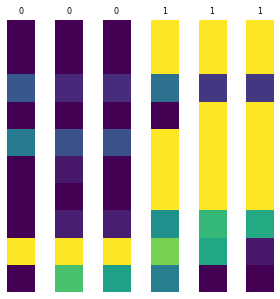

In [211]:
fig = plt.figure(figsize=(5, 5))
index_selection = [28552, 20603, 8537, 43222, 37501, 38877]

i = 1
for index in index_selection:

    img = x_train[index]
    fig.add_subplot(1, len(index_selection), i)
    i += 1
    
    if y_train[index] == 0:
        plt.title('0', fontsize=8)
    if y_train[index] == 1:
        plt.title('1', fontsize=8)
    
    plt.axis("off")
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.imshow(img)

plt.show()

### **Convolutional Neural Network (CNN)**


#### **Define Function**

In [32]:
from functools import *
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv1D, AveragePooling1D, Flatten, LeakyReLU
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger, Callback
from tensorflow.keras import optimizers

In [64]:
model = Sequential()
model.add(Conv1D(filters=60, kernel_size=2, activation='relu', input_shape=(10, 1)))
model.add(AveragePooling1D(pool_size=2))
model.add(Conv1D(filters=30, kernel_size=2, activation='relu', input_shape=(20, 1)))
model.add(Dropout(rate=0.1))
model.add(Flatten())
model.add(Dense(120, activation='softmax'))
model.add(Dropout(rate=0.1))
model.add(Dense(60, activation='softmax'))
model.add(Dense(1))

model.compile(optimizer='nadam', loss='mse', metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 9, 60)             180       
                                                                 
 average_pooling1d_7 (Avera  (None, 4, 60)             0         
 gePooling1D)                                                    
                                                                 
 conv1d_17 (Conv1D)          (None, 3, 30)             3630      
                                                                 
 dropout_16 (Dropout)        (None, 3, 30)             0         
                                                                 
 flatten_8 (Flatten)         (None, 90)                0         
                                                                 
 dense_24 (Dense)            (None, 120)               10920     
                                                      

#### **Training Model**

In [65]:
import os

best_model_path = os.path.join('.', 'best_model_keras')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,
                   patience=60, min_delta=0.001)

rlp = ReduceLROnPlateau(monitor='val_loss', factor=0.75, patience=10, verbose=1, mode='min',
                        min_delta=0.001, cooldown=1, min_lr=0.00001)

mcp = ModelCheckpoint(best_model_path, monitor='val_loss', mode='min', verbose=1,
                      save_best_only=True, save_weights_only=False, period=1)

In [66]:
%%time
history = model.fit(x_train, y_train, epochs=100, verbose=1, batch_size=100,
                    shuffle=True, validation_split=0.2,
                    callbacks=[mcp, rlp, es])

Epoch 1/100
382/385 [============================>.] - ETA: 0s - loss: 0.3039 - accuracy: 0.4984
Epoch 1: val_loss improved from inf to 0.23888, saving model to .\best_model_keras
INFO:tensorflow:Assets written to: .\best_model_keras\assets


INFO:tensorflow:Assets written to: .\best_model_keras\assets


385/385 [==============================] - 11s 22ms/step - loss: 0.3034 - accuracy: 0.4996 - val_loss: 0.2389 - val_accuracy: 0.6943 - lr: 0.0010
Epoch 2/100
384/385 [============================>.] - ETA: 0s - loss: 0.2234 - accuracy: 0.6881
Epoch 2: val_loss improved from 0.23888 to 0.20586, saving model to .\best_model_keras
INFO:tensorflow:Assets written to: .\best_model_keras\assets


INFO:tensorflow:Assets written to: .\best_model_keras\assets


385/385 [==============================] - 10s 25ms/step - loss: 0.2234 - accuracy: 0.6879 - val_loss: 0.2059 - val_accuracy: 0.7094 - lr: 0.0010
Epoch 3/100
384/385 [============================>.] - ETA: 0s - loss: 0.2043 - accuracy: 0.7040
Epoch 3: val_loss improved from 0.20586 to 0.19654, saving model to .\best_model_keras
INFO:tensorflow:Assets written to: .\best_model_keras\assets


INFO:tensorflow:Assets written to: .\best_model_keras\assets


385/385 [==============================] - 6s 16ms/step - loss: 0.2043 - accuracy: 0.7039 - val_loss: 0.1965 - val_accuracy: 0.7113 - lr: 0.0010
Epoch 4/100
379/385 [============================>.] - ETA: 0s - loss: 0.1987 - accuracy: 0.7051
Epoch 4: val_loss improved from 0.19654 to 0.19085, saving model to .\best_model_keras
INFO:tensorflow:Assets written to: .\best_model_keras\assets


INFO:tensorflow:Assets written to: .\best_model_keras\assets


385/385 [==============================] - 6s 16ms/step - loss: 0.1986 - accuracy: 0.7054 - val_loss: 0.1908 - val_accuracy: 0.7151 - lr: 0.0010
Epoch 5/100
377/385 [============================>.] - ETA: 0s - loss: 0.1958 - accuracy: 0.7084
Epoch 5: val_loss improved from 0.19085 to 0.18891, saving model to .\best_model_keras
INFO:tensorflow:Assets written to: .\best_model_keras\assets


INFO:tensorflow:Assets written to: .\best_model_keras\assets


385/385 [==============================] - 6s 16ms/step - loss: 0.1959 - accuracy: 0.7082 - val_loss: 0.1889 - val_accuracy: 0.7165 - lr: 0.0010
Epoch 6/100
385/385 [==============================] - ETA: 0s - loss: 0.1943 - accuracy: 0.7086
Epoch 6: val_loss improved from 0.18891 to 0.18740, saving model to .\best_model_keras
INFO:tensorflow:Assets written to: .\best_model_keras\assets


INFO:tensorflow:Assets written to: .\best_model_keras\assets


385/385 [==============================] - 5s 12ms/step - loss: 0.1943 - accuracy: 0.7086 - val_loss: 0.1874 - val_accuracy: 0.7213 - lr: 0.0010
Epoch 7/100
379/385 [============================>.] - ETA: 0s - loss: 0.1928 - accuracy: 0.7106
Epoch 7: val_loss improved from 0.18740 to 0.18605, saving model to .\best_model_keras
INFO:tensorflow:Assets written to: .\best_model_keras\assets


INFO:tensorflow:Assets written to: .\best_model_keras\assets


385/385 [==============================] - 5s 13ms/step - loss: 0.1929 - accuracy: 0.7101 - val_loss: 0.1860 - val_accuracy: 0.7241 - lr: 0.0010
Epoch 8/100
377/385 [============================>.] - ETA: 0s - loss: 0.1917 - accuracy: 0.7133
Epoch 8: val_loss improved from 0.18605 to 0.18476, saving model to .\best_model_keras
INFO:tensorflow:Assets written to: .\best_model_keras\assets


INFO:tensorflow:Assets written to: .\best_model_keras\assets


385/385 [==============================] - 5s 12ms/step - loss: 0.1918 - accuracy: 0.7131 - val_loss: 0.1848 - val_accuracy: 0.7223 - lr: 0.0010
Epoch 9/100
383/385 [============================>.] - ETA: 0s - loss: 0.1910 - accuracy: 0.7143
Epoch 9: val_loss did not improve from 0.18476
385/385 [==============================] - 2s 6ms/step - loss: 0.1910 - accuracy: 0.7143 - val_loss: 0.1850 - val_accuracy: 0.7192 - lr: 0.0010
Epoch 10/100
384/385 [============================>.] - ETA: 0s - loss: 0.1902 - accuracy: 0.7153
Epoch 10: val_loss improved from 0.18476 to 0.18436, saving model to .\best_model_keras
INFO:tensorflow:Assets written to: .\best_model_keras\assets


INFO:tensorflow:Assets written to: .\best_model_keras\assets


385/385 [==============================] - 5s 12ms/step - loss: 0.1902 - accuracy: 0.7154 - val_loss: 0.1844 - val_accuracy: 0.7249 - lr: 0.0010
Epoch 11/100
377/385 [============================>.] - ETA: 0s - loss: 0.1899 - accuracy: 0.7164
Epoch 11: val_loss improved from 0.18436 to 0.18391, saving model to .\best_model_keras
INFO:tensorflow:Assets written to: .\best_model_keras\assets


INFO:tensorflow:Assets written to: .\best_model_keras\assets


385/385 [==============================] - 6s 15ms/step - loss: 0.1899 - accuracy: 0.7166 - val_loss: 0.1839 - val_accuracy: 0.7254 - lr: 0.0010
Epoch 12/100
385/385 [==============================] - ETA: 0s - loss: 0.1899 - accuracy: 0.7163
Epoch 12: val_loss improved from 0.18391 to 0.18390, saving model to .\best_model_keras
INFO:tensorflow:Assets written to: .\best_model_keras\assets


INFO:tensorflow:Assets written to: .\best_model_keras\assets


385/385 [==============================] - 5s 13ms/step - loss: 0.1899 - accuracy: 0.7163 - val_loss: 0.1839 - val_accuracy: 0.7219 - lr: 0.0010
Epoch 13/100
380/385 [============================>.] - ETA: 0s - loss: 0.1898 - accuracy: 0.7163
Epoch 13: val_loss improved from 0.18390 to 0.18364, saving model to .\best_model_keras
INFO:tensorflow:Assets written to: .\best_model_keras\assets


INFO:tensorflow:Assets written to: .\best_model_keras\assets


385/385 [==============================] - 4s 11ms/step - loss: 0.1896 - accuracy: 0.7166 - val_loss: 0.1836 - val_accuracy: 0.7243 - lr: 0.0010
Epoch 14/100
381/385 [============================>.] - ETA: 0s - loss: 0.1891 - accuracy: 0.7172
Epoch 14: val_loss improved from 0.18364 to 0.18357, saving model to .\best_model_keras
INFO:tensorflow:Assets written to: .\best_model_keras\assets


INFO:tensorflow:Assets written to: .\best_model_keras\assets


385/385 [==============================] - 5s 14ms/step - loss: 0.1891 - accuracy: 0.7171 - val_loss: 0.1836 - val_accuracy: 0.7231 - lr: 0.0010
Epoch 15/100
383/385 [============================>.] - ETA: 0s - loss: 0.1885 - accuracy: 0.7166
Epoch 15: val_loss improved from 0.18357 to 0.18272, saving model to .\best_model_keras
INFO:tensorflow:Assets written to: .\best_model_keras\assets


INFO:tensorflow:Assets written to: .\best_model_keras\assets


385/385 [==============================] - 5s 12ms/step - loss: 0.1885 - accuracy: 0.7168 - val_loss: 0.1827 - val_accuracy: 0.7240 - lr: 0.0010
Epoch 16/100
381/385 [============================>.] - ETA: 0s - loss: 0.1882 - accuracy: 0.7181
Epoch 16: val_loss did not improve from 0.18272
385/385 [==============================] - 3s 7ms/step - loss: 0.1883 - accuracy: 0.7178 - val_loss: 0.1834 - val_accuracy: 0.7235 - lr: 0.0010
Epoch 17/100
379/385 [============================>.] - ETA: 0s - loss: 0.1883 - accuracy: 0.7180
Epoch 17: val_loss did not improve from 0.18272
385/385 [==============================] - 3s 7ms/step - loss: 0.1884 - accuracy: 0.7177 - val_loss: 0.1834 - val_accuracy: 0.7231 - lr: 0.0010
Epoch 18/100
383/385 [============================>.] - ETA: 0s - loss: 0.1881 - accuracy: 0.7182
Epoch 18: val_loss did not improve from 0.18272
385/385 [==============================] - 3s 7ms/step - loss: 0.1880 - accuracy: 0.7183 - val_loss: 0.1831 - val_accuracy: 0.724

INFO:tensorflow:Assets written to: .\best_model_keras\assets


385/385 [==============================] - 5s 14ms/step - loss: 0.1875 - accuracy: 0.7187 - val_loss: 0.1825 - val_accuracy: 0.7247 - lr: 0.0010
Epoch 22/100
376/385 [============================>.] - ETA: 0s - loss: 0.1875 - accuracy: 0.7185
Epoch 22: val_loss improved from 0.18250 to 0.18171, saving model to .\best_model_keras
INFO:tensorflow:Assets written to: .\best_model_keras\assets


INFO:tensorflow:Assets written to: .\best_model_keras\assets


385/385 [==============================] - 5s 12ms/step - loss: 0.1875 - accuracy: 0.7187 - val_loss: 0.1817 - val_accuracy: 0.7281 - lr: 0.0010
Epoch 23/100
380/385 [============================>.] - ETA: 0s - loss: 0.1874 - accuracy: 0.7201
Epoch 23: val_loss did not improve from 0.18171
385/385 [==============================] - 3s 8ms/step - loss: 0.1873 - accuracy: 0.7204 - val_loss: 0.1820 - val_accuracy: 0.7265 - lr: 0.0010
Epoch 24/100
384/385 [============================>.] - ETA: 0s - loss: 0.1870 - accuracy: 0.7201
Epoch 24: val_loss improved from 0.18171 to 0.18155, saving model to .\best_model_keras
INFO:tensorflow:Assets written to: .\best_model_keras\assets


INFO:tensorflow:Assets written to: .\best_model_keras\assets


385/385 [==============================] - 5s 13ms/step - loss: 0.1870 - accuracy: 0.7201 - val_loss: 0.1816 - val_accuracy: 0.7285 - lr: 0.0010
Epoch 25/100
384/385 [============================>.] - ETA: 0s - loss: 0.1862 - accuracy: 0.7218
Epoch 25: val_loss did not improve from 0.18155
385/385 [==============================] - 2s 6ms/step - loss: 0.1863 - accuracy: 0.7217 - val_loss: 0.1819 - val_accuracy: 0.7260 - lr: 0.0010
Epoch 26/100
380/385 [============================>.] - ETA: 0s - loss: 0.1870 - accuracy: 0.7198
Epoch 26: val_loss improved from 0.18155 to 0.18139, saving model to .\best_model_keras
INFO:tensorflow:Assets written to: .\best_model_keras\assets


INFO:tensorflow:Assets written to: .\best_model_keras\assets


385/385 [==============================] - 4s 12ms/step - loss: 0.1871 - accuracy: 0.7197 - val_loss: 0.1814 - val_accuracy: 0.7275 - lr: 0.0010
Epoch 27/100
378/385 [============================>.] - ETA: 0s - loss: 0.1861 - accuracy: 0.7212
Epoch 27: val_loss improved from 0.18139 to 0.18111, saving model to .\best_model_keras
INFO:tensorflow:Assets written to: .\best_model_keras\assets


INFO:tensorflow:Assets written to: .\best_model_keras\assets


385/385 [==============================] - 5s 13ms/step - loss: 0.1861 - accuracy: 0.7213 - val_loss: 0.1811 - val_accuracy: 0.7290 - lr: 0.0010
Epoch 28/100
380/385 [============================>.] - ETA: 0s - loss: 0.1863 - accuracy: 0.7219
Epoch 28: val_loss did not improve from 0.18111
385/385 [==============================] - 3s 7ms/step - loss: 0.1863 - accuracy: 0.7218 - val_loss: 0.1820 - val_accuracy: 0.7269 - lr: 0.0010
Epoch 29/100
384/385 [============================>.] - ETA: 0s - loss: 0.1856 - accuracy: 0.7226
Epoch 29: val_loss did not improve from 0.18111
385/385 [==============================] - 3s 7ms/step - loss: 0.1855 - accuracy: 0.7228 - val_loss: 0.1814 - val_accuracy: 0.7279 - lr: 0.0010
Epoch 30/100
382/385 [============================>.] - ETA: 0s - loss: 0.1860 - accuracy: 0.7206
Epoch 30: val_loss improved from 0.18111 to 0.18065, saving model to .\best_model_keras
INFO:tensorflow:Assets written to: .\best_model_keras\assets


INFO:tensorflow:Assets written to: .\best_model_keras\assets


385/385 [==============================] - 5s 13ms/step - loss: 0.1860 - accuracy: 0.7207 - val_loss: 0.1807 - val_accuracy: 0.7287 - lr: 0.0010
Epoch 31/100
379/385 [============================>.] - ETA: 0s - loss: 0.1857 - accuracy: 0.7220
Epoch 31: val_loss did not improve from 0.18065
385/385 [==============================] - 3s 6ms/step - loss: 0.1858 - accuracy: 0.7219 - val_loss: 0.1808 - val_accuracy: 0.7285 - lr: 0.0010
Epoch 32/100
379/385 [============================>.] - ETA: 0s - loss: 0.1859 - accuracy: 0.7209
Epoch 32: val_loss improved from 0.18065 to 0.18045, saving model to .\best_model_keras
INFO:tensorflow:Assets written to: .\best_model_keras\assets


INFO:tensorflow:Assets written to: .\best_model_keras\assets


385/385 [==============================] - 5s 14ms/step - loss: 0.1857 - accuracy: 0.7213 - val_loss: 0.1805 - val_accuracy: 0.7293 - lr: 0.0010
Epoch 33/100
378/385 [============================>.] - ETA: 0s - loss: 0.1856 - accuracy: 0.7214
Epoch 33: val_loss improved from 0.18045 to 0.18021, saving model to .\best_model_keras
INFO:tensorflow:Assets written to: .\best_model_keras\assets


INFO:tensorflow:Assets written to: .\best_model_keras\assets


385/385 [==============================] - 5s 12ms/step - loss: 0.1856 - accuracy: 0.7217 - val_loss: 0.1802 - val_accuracy: 0.7289 - lr: 0.0010
Epoch 34/100
384/385 [============================>.] - ETA: 0s - loss: 0.1851 - accuracy: 0.7215
Epoch 34: val_loss did not improve from 0.18021
385/385 [==============================] - 2s 6ms/step - loss: 0.1852 - accuracy: 0.7214 - val_loss: 0.1810 - val_accuracy: 0.7293 - lr: 0.0010
Epoch 35/100
380/385 [============================>.] - ETA: 0s - loss: 0.1852 - accuracy: 0.7227
Epoch 35: val_loss did not improve from 0.18021
385/385 [==============================] - 3s 7ms/step - loss: 0.1852 - accuracy: 0.7228 - val_loss: 0.1814 - val_accuracy: 0.7274 - lr: 0.0010
Epoch 36/100
379/385 [============================>.] - ETA: 0s - loss: 0.1851 - accuracy: 0.7229
Epoch 36: val_loss did not improve from 0.18021
385/385 [==============================] - 3s 8ms/step - loss: 0.1852 - accuracy: 0.7226 - val_loss: 0.1808 - val_accuracy: 0.725

INFO:tensorflow:Assets written to: .\best_model_keras\assets



Epoch 43: ReduceLROnPlateau reducing learning rate to 0.0007500000356230885.
385/385 [==============================] - 6s 14ms/step - loss: 0.1848 - accuracy: 0.7220 - val_loss: 0.1801 - val_accuracy: 0.7281 - lr: 0.0010
Epoch 44/100
383/385 [============================>.] - ETA: 0s - loss: 0.1843 - accuracy: 0.7247
Epoch 44: val_loss did not improve from 0.18006
385/385 [==============================] - 3s 7ms/step - loss: 0.1843 - accuracy: 0.7246 - val_loss: 0.1803 - val_accuracy: 0.7290 - lr: 7.5000e-04
Epoch 45/100
382/385 [============================>.] - ETA: 0s - loss: 0.1844 - accuracy: 0.7242
Epoch 45: val_loss did not improve from 0.18006
385/385 [==============================] - 3s 7ms/step - loss: 0.1844 - accuracy: 0.7240 - val_loss: 0.1801 - val_accuracy: 0.7303 - lr: 7.5000e-04
Epoch 46/100
380/385 [============================>.] - ETA: 0s - loss: 0.1838 - accuracy: 0.7238
Epoch 46: val_loss improved from 0.18006 to 0.17970, saving model to .\best_model_keras
INF

INFO:tensorflow:Assets written to: .\best_model_keras\assets


385/385 [==============================] - 6s 14ms/step - loss: 0.1839 - accuracy: 0.7236 - val_loss: 0.1797 - val_accuracy: 0.7300 - lr: 7.5000e-04
Epoch 47/100
375/385 [============================>.] - ETA: 0s - loss: 0.1840 - accuracy: 0.7253
Epoch 47: val_loss improved from 0.17970 to 0.17962, saving model to .\best_model_keras
INFO:tensorflow:Assets written to: .\best_model_keras\assets


INFO:tensorflow:Assets written to: .\best_model_keras\assets


385/385 [==============================] - 5s 13ms/step - loss: 0.1841 - accuracy: 0.7252 - val_loss: 0.1796 - val_accuracy: 0.7296 - lr: 7.5000e-04
Epoch 48/100
384/385 [============================>.] - ETA: 0s - loss: 0.1842 - accuracy: 0.7242
Epoch 48: val_loss did not improve from 0.17962
385/385 [==============================] - 2s 6ms/step - loss: 0.1842 - accuracy: 0.7242 - val_loss: 0.1801 - val_accuracy: 0.7290 - lr: 7.5000e-04
Epoch 49/100
385/385 [==============================] - ETA: 0s - loss: 0.1844 - accuracy: 0.7225
Epoch 49: val_loss improved from 0.17962 to 0.17955, saving model to .\best_model_keras
INFO:tensorflow:Assets written to: .\best_model_keras\assets


INFO:tensorflow:Assets written to: .\best_model_keras\assets


385/385 [==============================] - 4s 12ms/step - loss: 0.1844 - accuracy: 0.7225 - val_loss: 0.1796 - val_accuracy: 0.7320 - lr: 7.5000e-04
Epoch 50/100
383/385 [============================>.] - ETA: 0s - loss: 0.1843 - accuracy: 0.7256
Epoch 50: val_loss did not improve from 0.17955
385/385 [==============================] - 3s 8ms/step - loss: 0.1843 - accuracy: 0.7255 - val_loss: 0.1804 - val_accuracy: 0.7295 - lr: 7.5000e-04
Epoch 51/100
382/385 [============================>.] - ETA: 0s - loss: 0.1844 - accuracy: 0.7252
Epoch 51: val_loss did not improve from 0.17955
385/385 [==============================] - 3s 9ms/step - loss: 0.1843 - accuracy: 0.7251 - val_loss: 0.1801 - val_accuracy: 0.7303 - lr: 7.5000e-04
Epoch 52/100
378/385 [============================>.] - ETA: 0s - loss: 0.1843 - accuracy: 0.7238
Epoch 52: val_loss improved from 0.17955 to 0.17953, saving model to .\best_model_keras
INFO:tensorflow:Assets written to: .\best_model_keras\assets


INFO:tensorflow:Assets written to: .\best_model_keras\assets


385/385 [==============================] - 5s 12ms/step - loss: 0.1842 - accuracy: 0.7240 - val_loss: 0.1795 - val_accuracy: 0.7314 - lr: 7.5000e-04
Epoch 53/100
382/385 [============================>.] - ETA: 0s - loss: 0.1845 - accuracy: 0.7235
Epoch 53: val_loss did not improve from 0.17953

Epoch 53: ReduceLROnPlateau reducing learning rate to 0.0005625000048894435.
385/385 [==============================] - 3s 8ms/step - loss: 0.1845 - accuracy: 0.7234 - val_loss: 0.1796 - val_accuracy: 0.7307 - lr: 7.5000e-04
Epoch 54/100
382/385 [============================>.] - ETA: 0s - loss: 0.1836 - accuracy: 0.7257
Epoch 54: val_loss improved from 0.17953 to 0.17941, saving model to .\best_model_keras
INFO:tensorflow:Assets written to: .\best_model_keras\assets


INFO:tensorflow:Assets written to: .\best_model_keras\assets


385/385 [==============================] - 6s 15ms/step - loss: 0.1837 - accuracy: 0.7256 - val_loss: 0.1794 - val_accuracy: 0.7318 - lr: 5.6250e-04
Epoch 55/100
382/385 [============================>.] - ETA: 0s - loss: 0.1841 - accuracy: 0.7237
Epoch 55: val_loss did not improve from 0.17941
385/385 [==============================] - 2s 6ms/step - loss: 0.1840 - accuracy: 0.7238 - val_loss: 0.1795 - val_accuracy: 0.7299 - lr: 5.6250e-04
Epoch 56/100
380/385 [============================>.] - ETA: 0s - loss: 0.1837 - accuracy: 0.7261
Epoch 56: val_loss did not improve from 0.17941
385/385 [==============================] - 3s 7ms/step - loss: 0.1838 - accuracy: 0.7256 - val_loss: 0.1804 - val_accuracy: 0.7308 - lr: 5.6250e-04
Epoch 57/100
382/385 [============================>.] - ETA: 0s - loss: 0.1833 - accuracy: 0.7257
Epoch 57: val_loss improved from 0.17941 to 0.17937, saving model to .\best_model_keras
INFO:tensorflow:Assets written to: .\best_model_keras\assets


INFO:tensorflow:Assets written to: .\best_model_keras\assets


385/385 [==============================] - 8s 20ms/step - loss: 0.1834 - accuracy: 0.7254 - val_loss: 0.1794 - val_accuracy: 0.7309 - lr: 5.6250e-04
Epoch 58/100
383/385 [============================>.] - ETA: 0s - loss: 0.1836 - accuracy: 0.7264
Epoch 58: val_loss did not improve from 0.17937
385/385 [==============================] - 4s 10ms/step - loss: 0.1836 - accuracy: 0.7264 - val_loss: 0.1796 - val_accuracy: 0.7316 - lr: 5.6250e-04
Epoch 59/100
382/385 [============================>.] - ETA: 0s - loss: 0.1835 - accuracy: 0.7260
Epoch 59: val_loss improved from 0.17937 to 0.17930, saving model to .\best_model_keras
INFO:tensorflow:Assets written to: .\best_model_keras\assets


INFO:tensorflow:Assets written to: .\best_model_keras\assets


385/385 [==============================] - 8s 20ms/step - loss: 0.1835 - accuracy: 0.7259 - val_loss: 0.1793 - val_accuracy: 0.7313 - lr: 5.6250e-04
Epoch 60/100
381/385 [============================>.] - ETA: 0s - loss: 0.1837 - accuracy: 0.7249
Epoch 60: val_loss improved from 0.17930 to 0.17926, saving model to .\best_model_keras
INFO:tensorflow:Assets written to: .\best_model_keras\assets


INFO:tensorflow:Assets written to: .\best_model_keras\assets


385/385 [==============================] - 6s 17ms/step - loss: 0.1837 - accuracy: 0.7249 - val_loss: 0.1793 - val_accuracy: 0.7305 - lr: 5.6250e-04
Epoch 61/100
384/385 [============================>.] - ETA: 0s - loss: 0.1840 - accuracy: 0.7241
Epoch 61: val_loss did not improve from 0.17926
385/385 [==============================] - 4s 10ms/step - loss: 0.1840 - accuracy: 0.7241 - val_loss: 0.1795 - val_accuracy: 0.7305 - lr: 5.6250e-04
Epoch 62/100
381/385 [============================>.] - ETA: 0s - loss: 0.1837 - accuracy: 0.7248
Epoch 62: val_loss did not improve from 0.17926
385/385 [==============================] - 3s 9ms/step - loss: 0.1835 - accuracy: 0.7253 - val_loss: 0.1799 - val_accuracy: 0.7321 - lr: 5.6250e-04
Epoch 63/100
382/385 [============================>.] - ETA: 0s - loss: 0.1837 - accuracy: 0.7243
Epoch 63: val_loss did not improve from 0.17926

Epoch 63: ReduceLROnPlateau reducing learning rate to 0.0004218749818392098.
385/385 [=============================

KeyboardInterrupt: 

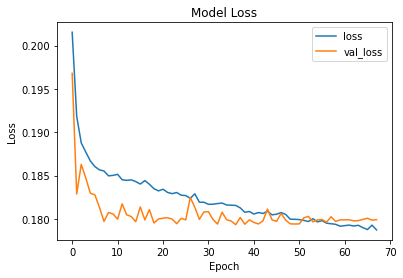

In [67]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

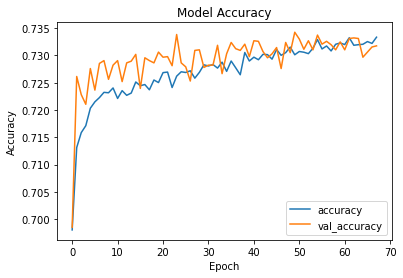

In [68]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [69]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
import seaborn as sns

test_res = model.evaluate(x_test, y_test, verbose=1)
print("Keras evaluate (last training) =", test_res)

376/376 [==============================] - 1s 1ms/step - loss: 0.1850 - accuracy: 0.7177
Keras evaluate (last training) = [0.18500155210494995, 0.717684268951416]


In [70]:
for i in range(0,100):
    threshold = round(0.4 + 0.002*i,3)
    
    y_pred = model.predict(x_test, verbose=0)
    y_pred = (y_pred > threshold)

    auc = np.round(roc_auc_score(y_test, y_pred), 5)
    print("When threshold is {}, AUC for our model is {}".format(threshold,auc))

When threshold is 0.4, AUC for our model is 0.68983
When threshold is 0.402, AUC for our model is 0.69046
When threshold is 0.404, AUC for our model is 0.6907
When threshold is 0.406, AUC for our model is 0.69131
When threshold is 0.408, AUC for our model is 0.69177
When threshold is 0.41, AUC for our model is 0.69238
When threshold is 0.412, AUC for our model is 0.69278
When threshold is 0.414, AUC for our model is 0.69294
When threshold is 0.416, AUC for our model is 0.69317
When threshold is 0.418, AUC for our model is 0.69359
When threshold is 0.42, AUC for our model is 0.69373
When threshold is 0.422, AUC for our model is 0.6941
When threshold is 0.424, AUC for our model is 0.69467
When threshold is 0.426, AUC for our model is 0.69506
When threshold is 0.428, AUC for our model is 0.69593
When threshold is 0.43, AUC for our model is 0.69622
When threshold is 0.432, AUC for our model is 0.69687
When threshold is 0.434, AUC for our model is 0.69721
When threshold is 0.436, AUC for ou

376/376 [==============================] - 0s 1ms/step
Auc for our sample data is 0.71928


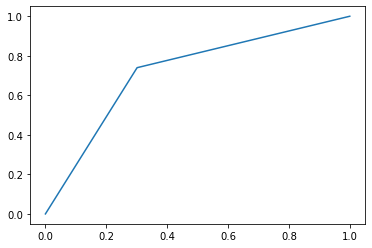

In [79]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.58)

auc = np.round(roc_auc_score(y_test, y_pred), 5)
print("Auc for our sample data is {}".format(auc))

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.show()

In [80]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[3897, 1680],
       [1677, 4768]], dtype=int64)

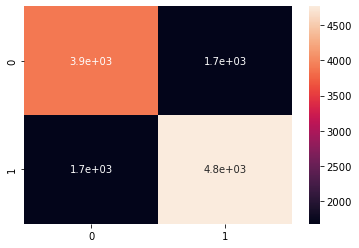

In [81]:
sns.heatmap(cm, annot=True)
plt.show()

In [82]:
# Accuracy
print((cm[0][0]+cm[1][1])/np.sum(cm))

0.720761936449842
